In [25]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline

In [34]:
FOG_Stim_conditions = pd.read_csv('FOG_Stim_conditions.csv', sep = ';')

In [38]:
FOG_Stim_conditions.dtypes

UPDRS_III           float64
Item_3_10           float64
Item_3_11           float64
Item_3_12           float64
SWS_time_s          float64
SWS_N_FOG_Events    float64
HY                  float64
AIMS                float64
dtype: object

In [7]:
FOG_Stim_conditions.isnull().sum()

patient              0
UPDRS_III            4
Item_3_10            4
Item_3_11            4
Item_3_12            4
SWS_time_s           9
SWS_N_FOG_Events     9
HY                   4
AIMS                10
condition            0
dtype: int64

In [8]:
FOG_Stim_conditions.nunique()

patient             18
UPDRS_III           39
Item_3_10            5
Item_3_11            5
Item_3_12            5
SWS_time_s          69
SWS_N_FOG_Events    24
HY                   4
AIMS                19
condition            5
dtype: int64

In [9]:
print(FOG_Stim_conditions)

    patient  UPDRS_III  Item_3_10  Item_3_11  Item_3_12  SWS_time_s  \
0      1684       43.0        2.0        0.0        0.0        42.0   
1    486931       53.0        2.0        0.0        0.0        38.0   
2    600294       46.0        2.0        3.0        0.0        40.0   
3   1093025       50.0        2.0        2.0        3.0        83.0   
4   1102776       53.0        2.0        3.0        3.0        49.0   
..      ...        ...        ...        ...        ...         ...   
85  2126706        NaN        NaN        NaN        NaN         NaN   
86  2162586       62.0        2.0        4.0        0.0        58.0   
87  2223671       44.0        2.0        4.0        0.0       166.0   
88  2295512       29.0        2.0        2.0        0.0        55.0   
89  2307872        NaN        NaN        NaN        NaN         NaN   

    SWS_N_FOG_Events   HY  AIMS            condition  
0                0.0  2.0   0.0      MED_OFF_STIM_ON  
1                0.0  2.0   0.0      

In [10]:
FOG_Stim_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient           90 non-null     int64  
 1   UPDRS_III         86 non-null     float64
 2   Item_3_10         86 non-null     float64
 3   Item_3_11         86 non-null     float64
 4   Item_3_12         86 non-null     float64
 5   SWS_time_s        81 non-null     float64
 6   SWS_N_FOG_Events  81 non-null     float64
 7   HY                86 non-null     float64
 8   AIMS              80 non-null     float64
 9   condition         90 non-null     object 
dtypes: float64(8), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
FOG_Stim_conditions.isnull().sum()

patient             0
UPDRS_III           0
Item_3_10           0
Item_3_11           0
Item_3_12           0
SWS_time_s          0
SWS_N_FOG_Events    0
HY                  0
AIMS                0
condition           0
dtype: int64

In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["UPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,18.0,60.277778,9.429650,41.0,55.25,59.5,65.75,79.0
MED_OFF_STIM_ON,18.0,43.777778,7.922830,28.0,37.75,46.0,49.50,54.0
MED_ON_STIM_OFF,18.0,47.777778,10.641514,34.0,37.25,50.5,54.50,71.0
MED_ON_STIM_ON,18.0,37.500000,9.024477,21.0,30.25,39.5,45.00,48.0
MED_ON_STIM_ON_60Hz,14.0,40.714286,10.636863,21.0,34.75,41.0,46.00,62.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_10"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,18.0,2.500000,0.618347,2.0,2.0,2.0,3.0,4.0
MED_OFF_STIM_ON,18.0,2.222222,0.427793,2.0,2.0,2.0,2.0,3.0
MED_ON_STIM_OFF,18.0,2.333333,0.840168,1.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON,18.0,2.111111,0.832352,0.0,2.0,2.0,2.0,4.0
MED_ON_STIM_ON_60Hz,14.0,2.000000,0.392232,1.0,2.0,2.0,2.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_11"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,18.0,3.222222,0.878204,2.0,2.25,3.5,4.00,4.0
MED_OFF_STIM_ON,18.0,2.277778,1.363626,0.0,1.25,2.0,3.75,4.0
MED_ON_STIM_OFF,18.0,2.722222,1.274434,1.0,2.00,2.5,4.00,4.0
MED_ON_STIM_ON,18.0,2.111111,1.278275,0.0,1.00,2.0,3.00,4.0
MED_ON_STIM_ON_60Hz,14.0,2.214286,1.423893,0.0,1.25,2.0,3.75,4.0


In [16]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_12"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,18.0,1.666667,1.455214,0.0,0.25,1.0,3.00,4.0
MED_OFF_STIM_ON,18.0,1.111111,1.529663,0.0,0.00,0.0,3.00,4.0
MED_ON_STIM_OFF,18.0,1.111111,1.567647,0.0,0.00,0.0,2.75,4.0
MED_ON_STIM_ON,18.0,0.944444,1.513555,0.0,0.00,0.0,1.75,4.0
MED_ON_STIM_ON_60Hz,14.0,0.571429,1.016350,0.0,0.00,0.0,0.75,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["SWS_time_s"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,18.0,205.111111,177.849536,39.0,55.50,153.0,261.00,599.0
MED_OFF_STIM_ON,18.0,110.666667,129.288551,20.0,35.75,50.5,122.75,478.0
MED_ON_STIM_OFF,16.0,108.687500,96.666932,15.0,35.50,63.5,171.75,321.0
MED_ON_STIM_ON,16.0,61.187500,42.236191,18.0,29.25,56.0,75.00,184.0
MED_ON_STIM_ON_60Hz,13.0,77.076923,57.953230,22.0,50.00,58.0,66.00,221.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["SWS_N_FOG_Events"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,18.0,15.555556,15.538272,2.0,4.00,10.5,19.75,55.0
MED_OFF_STIM_ON,18.0,8.555556,11.907596,0.0,1.25,2.5,11.25,36.0
MED_ON_STIM_OFF,16.0,8.062500,8.185098,1.0,1.75,3.5,16.75,21.0
MED_ON_STIM_ON,16.0,3.500000,4.066120,0.0,1.00,2.0,4.25,14.0
MED_ON_STIM_ON_60Hz,13.0,6.538462,8.996438,0.0,1.00,3.0,7.00,31.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["HY"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,18.0,2.722222,0.958280,2.0,2.0,2.0,3.00,5.0
MED_OFF_STIM_ON,18.0,2.500000,0.785905,2.0,2.0,2.0,3.00,4.0
MED_ON_STIM_OFF,18.0,2.555556,1.041618,2.0,2.0,2.0,2.75,5.0
MED_ON_STIM_ON,18.0,2.388889,0.849837,2.0,2.0,2.0,2.00,5.0
MED_ON_STIM_ON_60Hz,14.0,2.142857,0.363137,2.0,2.0,2.0,2.00,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["AIMS"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,5.411765,8.178163,0.0,0.0,4.0,6.0,32.0
MED_OFF_STIM_ON,17.0,3.764706,6.923957,0.0,0.0,0.0,4.0,26.0
MED_ON_STIM_OFF,16.0,9.062500,9.712320,0.0,0.0,7.0,12.5,26.0
MED_ON_STIM_ON,16.0,9.125000,11.797599,0.0,1.5,5.0,12.0,44.0
MED_ON_STIM_ON_60Hz,14.0,12.857143,13.421321,0.0,2.5,8.0,19.5,42.0


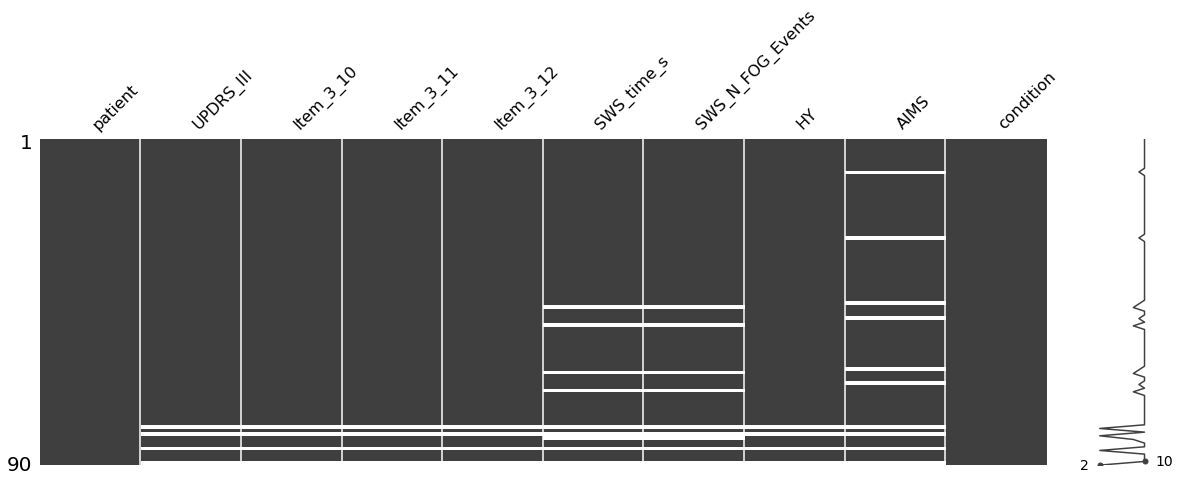

In [19]:
mno.matrix(FOG_Stim_conditions,figsize = (20,6))

In [35]:
patid_FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,0:1]

In [36]:
condition_FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,9:10]

In [37]:
FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,1:9]

In [39]:
  
missing_columns = ["UPDRS_III","Item_3_10", "Item_3_11", "Item_3_12", "SWS_time_s", "SWS_N_FOG_Events", "HY", "AIMS"]

In [40]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [41]:
for feature in missing_columns:
    FOG_Stim_conditions[feature + '_imp'] = FOG_Stim_conditions[feature]
    FOG_Stim_conditions = random_imputation(FOG_Stim_conditions, feature)

In [42]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = FOG_Stim_conditions[feature + "_imp"]
    parameters = list(set(FOG_Stim_conditions.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = FOG_Stim_conditions[parameters], y = FOG_Stim_conditions[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[FOG_Stim_conditions[feature].isnull(), "Det" + feature] = model.predict(FOG_Stim_conditions[parameters])[FOG_Stim_conditions[feature].isnull()]

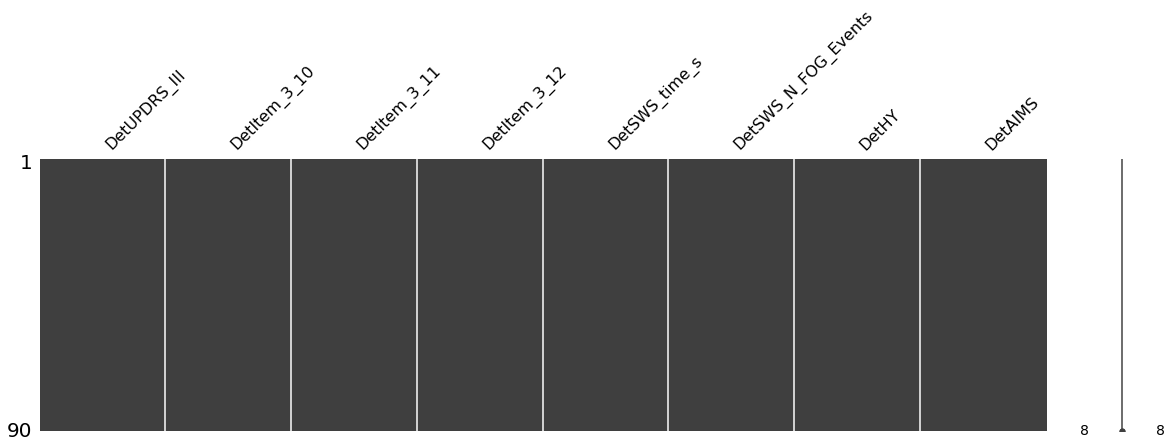

In [43]:
mno.matrix(deter_data, figsize = (20,5))


In [44]:
deter_data

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS
0,43.000000,2.000000,0.000000,0.000000,42.000000,0.000000,2.000000,0.000000
1,53.000000,2.000000,0.000000,0.000000,38.000000,0.000000,2.000000,0.000000
2,46.000000,2.000000,3.000000,0.000000,40.000000,4.000000,2.000000,4.000000
3,50.000000,2.000000,2.000000,3.000000,83.000000,2.000000,3.000000,4.000000
4,53.000000,2.000000,3.000000,3.000000,49.000000,6.000000,4.000000,26.000000
...,...,...,...,...,...,...,...,...
85,48.981257,2.468966,3.309089,0.229421,181.252934,15.609587,2.666907,8.080227
86,62.000000,2.000000,4.000000,0.000000,58.000000,3.000000,2.000000,10.000000
87,44.000000,2.000000,4.000000,0.000000,166.000000,12.000000,3.000000,12.000000
88,29.000000,2.000000,2.000000,0.000000,55.000000,4.000000,2.000000,20.000000


In [45]:
deter_data = pd.concat([deter_data, condition_FOG_Stim_conditions], axis = 1)

In [46]:
deter_data

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,condition
0,43.000000,2.000000,0.000000,0.000000,42.000000,0.000000,2.000000,0.000000,MED_OFF_STIM_ON
1,53.000000,2.000000,0.000000,0.000000,38.000000,0.000000,2.000000,0.000000,MED_OFF_STIM_ON
2,46.000000,2.000000,3.000000,0.000000,40.000000,4.000000,2.000000,4.000000,MED_OFF_STIM_ON
3,50.000000,2.000000,2.000000,3.000000,83.000000,2.000000,3.000000,4.000000,MED_OFF_STIM_ON
4,53.000000,2.000000,3.000000,3.000000,49.000000,6.000000,4.000000,26.000000,MED_OFF_STIM_ON
...,...,...,...,...,...,...,...,...,...
85,48.981257,2.468966,3.309089,0.229421,181.252934,15.609587,2.666907,8.080227,MED_ON_STIM_ON_60Hz
86,62.000000,2.000000,4.000000,0.000000,58.000000,3.000000,2.000000,10.000000,MED_ON_STIM_ON_60Hz
87,44.000000,2.000000,4.000000,0.000000,166.000000,12.000000,3.000000,12.000000,MED_ON_STIM_ON_60Hz
88,29.000000,2.000000,2.000000,0.000000,55.000000,4.000000,2.000000,20.000000,MED_ON_STIM_ON_60Hz


[Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

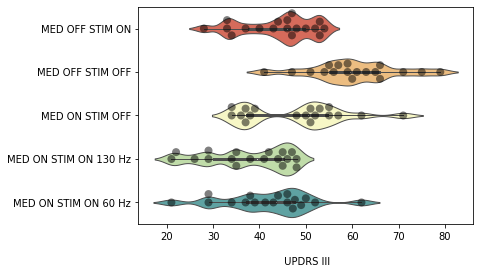

In [47]:
ax = sns.violinplot(x="DetUPDRS_III", y="condition", data=deter_data, palette="Spectral", linewidth = 1, alpha = 1, bw=0.2, cut=2)

sns.swarmplot(y = "condition", 
                x = "DetUPDRS_III", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(ylabel=None)
ax.set(xlabel="\n UPDRS III")

ax.set_yticklabels(['MED OFF STIM ON', 'MED OFF STIM OFF', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])


In [ ]:
# Plot data
sns.set(style="whitegrid")

[Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

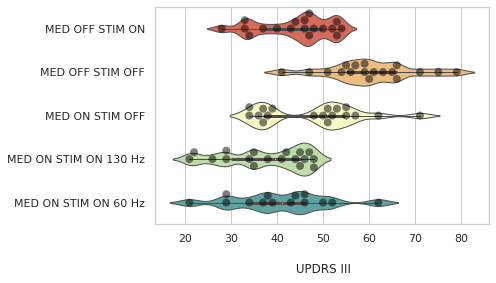

In [ ]:

ax = sns.violinplot(x="UPDRS_III", y="condition", data=FOG_Stim_conditions, palette="Spectral", linewidth = 1, alpha = 1, bw=0.2, cut=2)

sns.swarmplot(y = "condition", 
                x = "UPDRS_III", 
                data = FOG_Stim_conditions, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(ylabel=None)
ax.set(xlabel="\n UPDRS III")

ax.set_yticklabels(['MED OFF STIM ON', 'MED OFF STIM OFF', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

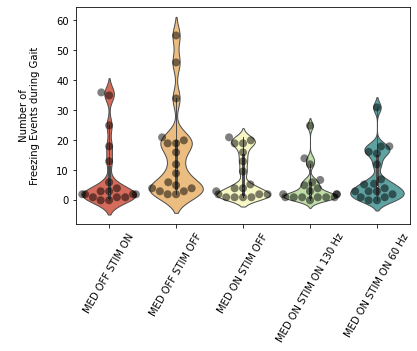

In [48]:
ax = sns.violinplot(x="condition", y="DetSWS_N_FOG_Events", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetSWS_N_FOG_Events", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Number of \n Freezing Events during Gait \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM ON', 'MED OFF STIM OFF', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

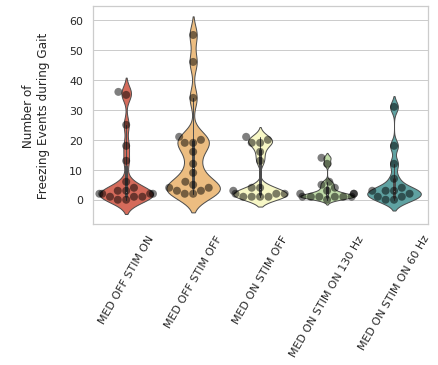

In [ ]:

ax = sns.violinplot(x="condition", y="SWS_N_FOG_Events", data=FOG_Stim_conditions, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "SWS_N_FOG_Events", 
                x = "condition", 
                data = FOG_Stim_conditions, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Number of \n Freezing Events during Gait \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM ON', 'MED OFF STIM OFF', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

In [ ]:
# If inputing NAs using a measure of central tendency
# FOG_Stim_conditions = FOG_Stim_conditions.fillna(FOG_Stim_conditions.groupby('condition').transform('mean'))

In [ ]:
#  Conduct the repeated measures ANOVA (UPDRS_III)
# FOG_Stim_conditions_UPDRS_III = FOG_Stim_conditions[FOG_Stim_conditions['UPDRS_III'].notnull()]

print(AnovaRM(data=FOG_Stim_conditions, 
              depvar="UPDRS_III",
              subject="patient", 
              within=["condition"]).fit())

In [ ]:
#  Conduct the repeated measures ANOVA (Item_3_10)

print(AnovaRM(data=FOG_Stim_conditions, 
              depvar="Item_3_10",
              subject="patient", 
              within=["condition"]).fit())

In [ ]:
#  Conduct the repeated measures ANOVA (Item_3_11)

print(AnovaRM(data=FOG_Stim_conditions, 
              depvar="Item_3_11",
              subject="patient", 
              within=["condition"]).fit())

In [ ]:
#  Conduct the repeated measures ANOVA (Item_3_12)

print(AnovaRM(data=FOG_Stim_conditions, 
              depvar="Item_3_12",
              subject="patient", 
              within=["condition"]).fit())

In [ ]:
#  Conduct the repeated measures ANOVA (SWS_time_s)

print(AnovaRM(data=FOG_Stim_conditions, 
              depvar="SWS_time_s",
              subject="patient", 
              within=["condition"]).fit())

In [ ]:
#  Conduct the repeated measures ANOVA (SWS_N_FOG_Events)

print(AnovaRM(data=FOG_Stim_conditions, 
              depvar="SWS_N_FOG_Events",
              subject="patient", 
              within=["condition"]).fit())

In [ ]:
#  Conduct the repeated measures ANOVA (HY)

print(AnovaRM(data=FOG_Stim_conditions, 
              depvar="HY",
              subject="patient", 
              within=["condition"]).fit())

In [ ]:
#  Conduct the repeated measures ANOVA (AIMS)

print(AnovaRM(data=FOG_Stim_conditions, 
              depvar="AIMS",
              subject="patient", 
              within=["condition"]).fit())